### 1. Treinar com p=2%

### 2. Melhoria nos augmentation
 - Crop nas imagens, como na predicao e validacao
 - random crop
 
### 3. Otimizacao dos valores de LR inicial
 - treinar a primeira epoca e verificar o melhor LR
 - verificar para os tres casos, teacher finetune e pseudolabels

### 4. Otimizar o fator k_best na geracao de pseudolabels
 - nao necessariamente 50%
 - pode variar para as diferentes particoes
 
### 5. Repetir os experimentos
 - com os valores encontrados, mais data augmentation, etc

### 6. Reduzir o tamanho inicial do conjunto para 10%
 - 20% de 10%, 10% de 10%, 5% de 10%, 2% de 10%
 - mesmos experimentos

### 7. Escrever um artigo

### 8. Realizar os experimentos para outra patologia (futuramente)
 - sem necessariamente a reducao do conjunto

### center crop com 224
### translate = 6.25%
### scale = 5%
### rotate = 15'
+ random perspective leve

In [2]:
164-(2.6+7+1.5+3.75+8+33)

108.15

In [11]:
import os
import sys
#os.chdir('./ChexNet')
os.getcwd()

'/home/roberto/Documents/CheXNet'

In [12]:
import numpy as np
from torchvision.transforms import transforms

In [13]:
total = 50_000

train5 = 5_000   # rotulado
train95 = 45_000 # nao rotulado

total_validacao = 7371
total_teste = 22_000

In [14]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [15]:
def tb_tags(path):
    ea = EventAccumulator(path)
    ea.Reload()
    return ea.Tags()['scalars']
    
def tb_values(path, tag):
    ea = EventAccumulator(path)
    ea.Reload()
    times, steps, vals = zip(*ea.Scalars(tag))
    return times, steps, vals

In [16]:
# 20%

teacher  = 'runs/effusion_train20%_teacher_00'
pseudo   = 'runs/effusion_train20%_pseudolabels_00'
finetune = 'runs/effusion_train20%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

DirectoryDeletedError: Directory runs/effusion_train20%_finetune_00 has been permanently deleted

In [ ]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 3)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 20%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_20%_partition.png')

In [ ]:
# 10%

teacher  = 'runs/effusion_train10%_teacher_00'
pseudo   = 'runs/effusion_train10%_pseudolabels_00'
finetune = 'runs/effusion_train10%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

In [ ]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 10%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_10%_partition.png')

In [ ]:
# 05%

teacher  = 'runs/effusion_train05%_teacher_00'
pseudo   = 'runs/effusion_train05%_pseudolabels_00'
finetune = 'runs/effusion_train05%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

In [ ]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])


for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 05%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_05%_partition.png')

In [ ]:
# 10%

teacher  = 'runs/effusion_train02%_teacher_00'
pseudo   = 'runs/effusion_train02%_pseudolabels_00'
finetune = 'runs/effusion_train02%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

In [ ]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])


for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 02%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_02%_partition.png')

In [ ]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_teacher_00', 'auroc/validation'))


plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

runtype = 'Teacher'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images/comparison_{runtype}.png')

In [ ]:
# comparacao pseudolabels
runtype = 'Pseudolabels'
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_pseudolabels_00', 'auroc/validation'))


plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])


for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images/comparison_{runtype}.png')

In [9]:
# comparacao students
runtype = 'Finetune'
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_finetune_00', 'auroc/validation'))


plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images/comparison_{runtype}.png')

DirectoryDeletedError: Directory runs/effusion_train20%_finetune_00 has been permanently deleted

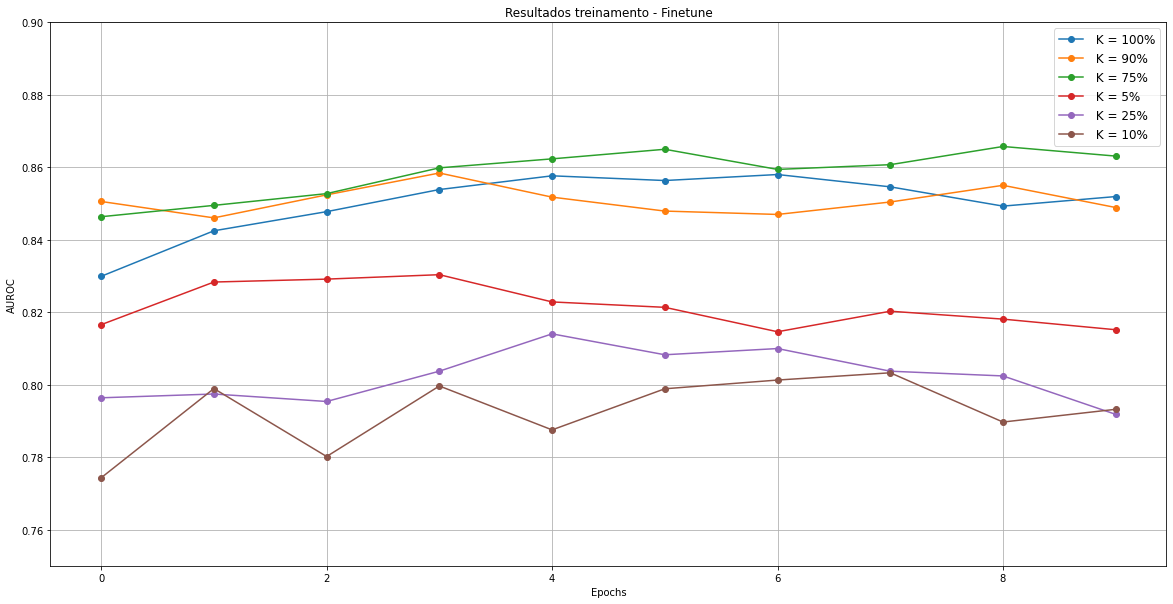

In [23]:
# comparacao K
import tikzplotlib

runtype = 'Finetune'
training_data = []
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.75,0.9])

labels_dict = {'1':'100%',
               '01':"10%",
               '025':"25%",
               '05':"5%",
               '075':"75%",
               '09':"90%"}

for k in ['1','09','075','05','025','01']:
    data = tb_values(f'/media/roberto/external/mestrado_backup/runs (k ratio tests, runs with k=0.75)/experiment with k ratio/effusion_train10%_pseudolabels_k{k}', 'auroc/validation')

    amax = np.argmax(data[2])
    
    plt.plot(data[2], '-o', label= f' K = {labels_dict[k]}')    
    #plt.plot(data[2], '-o', label= f' K = {k} - Max : {round(data[2][amax], 2)}')    

    #plt.plot(amax, data[2][amax], 'x')


    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images/comparison_{runtype}.png')
tikzplotlib.save('./paper_images/k_comparison.tex')

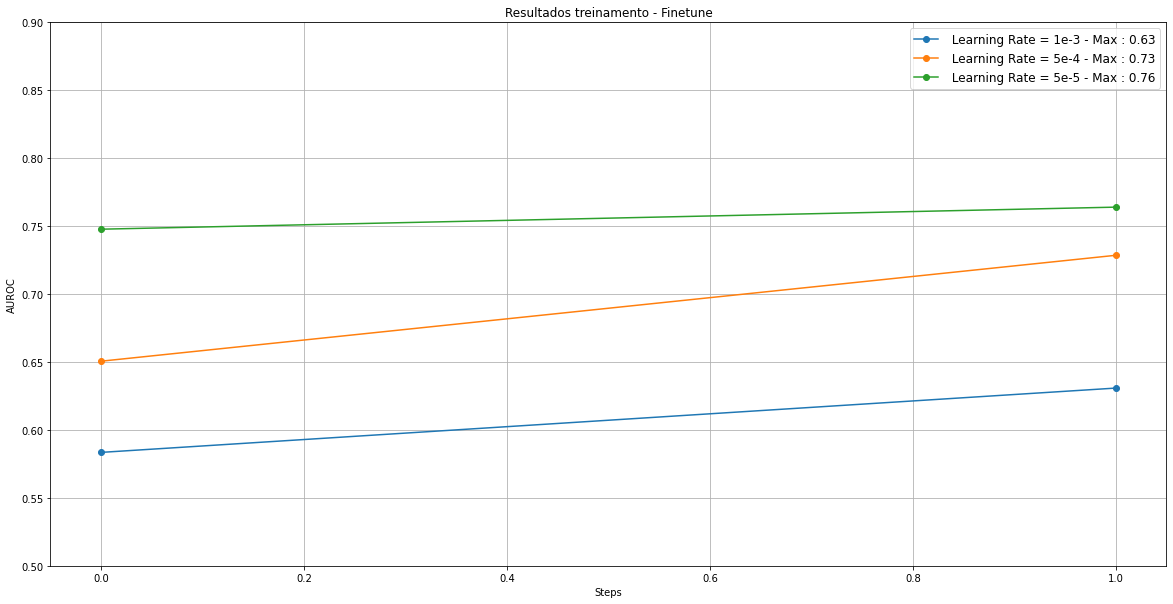

In [18]:
# comparacao students
runtype = 'Finetune'
training_data = []
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.5,0.9])

lrs = ['1e-3','5e-4', '5e-5']
for i, n in enumerate([0,1,3]):
    data = tb_values(f'/media/roberto/external/mestrado_backup/runs (augmentation tests, strong augmentration)/evaluate learning (rate with strong augmentation)/effusion_train10%_teacher_evaluate_lr_strong_0{n}', 'auroc/validation')

    amax = np.argmax(data[2])
    plt.plot(data[2], '-o', label= f' Learning Rate = {lrs[i]} - Max : {round(data[2][amax], 2)}')    
    #plt.plot(amax, data[2][amax], 'x')


    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images/comparison_{runtype}.png')

In [1]:
from utils.data_loader import train_data_loader, validation_data_loader
import cv2.cv2
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from read_data import ChestXrayDataSet
import albumentations as A
from albumentations.pytorch import ToTensorV2



In [6]:
CKPT_PATH=None,
CHOSEN_CLASS=2,
TRAIN_IMAGE_LIST= f'./labels/binary_Effusion/train02%.txt'
EPOCHS=25,
LR=1e-4,
LR_STEP=0.95,
VAL_IMAGE_LIST='./labels/binary_Effusion/val.txt',
LOADER_TYPE='strong_random_crop'
from config import DATA_DIR
train_loader = train_data_loader(DATA_DIR, TRAIN_IMAGE_LIST, 1, LOADER_TYPE)


=> using a data loader of type [strong_random_crop]
Augmentation type : torchvision --- from [<class 'torchvision.transforms.transforms.Compose'>]


In [7]:
itera=train_loader._get_iterator()

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
res = itera.next()
img = res[0][0][0].cpu().detach().numpy()
img = img.reshape([256,256])

plt.imshow(img, cmap='gray')

res[1]

RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "/home/roberto/Documents/CheXNet/.env/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 31, in _pin_memory_loop
    data = pin_memory(data)
  File "/home/roberto/Documents/CheXNet/.env/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in pin_memory
    return [pin_memory(sample) for sample in data]
  File "/home/roberto/Documents/CheXNet/.env/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in <listcomp>
    return [pin_memory(sample) for sample in data]
  File "/home/roberto/Documents/CheXNet/.env/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 47, in pin_memory
    return data.pin_memory()
RuntimeError: cuda runtime error (2) : out of memory at /pytorch/aten/src/THC/THCCachingHostAllocator.cpp:278


In [40]:
for res in train_loader:
    print('a')

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
